<a href="https://colab.research.google.com/github/fangxu622/slam/blob/master/kitti_BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 环境安装 与 google drive 挂载

In [2]:
!nvidia-smi
!pip install torch==1.4 torchvision==0.5
!pip install 'git+https://github.com/facebookresearch/pytorch3d.git@stable'
!pip install scikit-image matplotlib imageio
!pip install black isort flake8

Mon Apr 27 01:13:18 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!wget https://raw.githubusercontent.com/facebookresearch/pytorch3d/master/docs/tutorials/utils/camera_visualization.py
from camera_visualization import plot_camera_scene

!mkdir data
!wget -P data https://raw.githubusercontent.com/facebookresearch/pytorch3d/master/docs/tutorials/data/camera_graph.pth

/content


# import modules

In [81]:
# imports
import torch
from pytorch3d.transforms.so3 import (
    so3_exponential_map,
    so3_relative_angle
)
from pytorch3d.renderer.cameras import (
    SfMPerspectiveCameras,
    SfMOrthographicCameras
)
# add path for demo utils
import sys
import os
sys.path.append(os.path.abspath(''))

import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt



# set for reproducibility
torch.manual_seed(42)

# 轨迹绘制

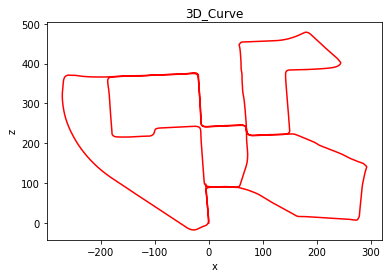

In [43]:
path="/content/drive/My Drive/Colab Notebooks/kitti-pose/00.txt"
data1 = np.loadtxt(path)

first_2000 = data1[:, 3]
second_2000 = data1[:, 7]
third_2000 = data1[:, 11]

# new a figure and set it into 3d
fig = plt.figure()
ax = fig.gca()
# set figure information
ax.set_title("3D_Curve")
ax.set_xlabel("x")
ax.set_ylabel("z")
#ax.set_zlabel("z")

figure1 = ax.plot(first_2000, third_2000, c='r')
plt.show()

(1, 3, 3)
(4541, 3, 3) (4541, 3) <class 'numpy.ndarray'>
300


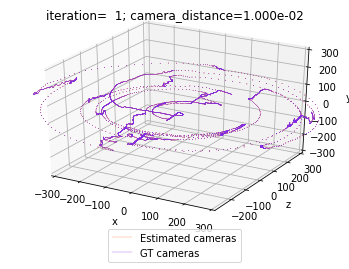

In [89]:
from camera_visualization1 import plot_camera_scene

def load_kitti_pose(path):

    #numpy
    R = np.array([]) 
    T = np.array([]) 
    data = np.loadtxt(path)
    for x in range(data.shape[0]):
        r1=np.row_stack((data[x,0:3],data[x,4:7],data[x,8:11]))[np.newaxis,:]
        t1=np.array([data[x,3],data[x,7],data[x,11]])
        if x==0:
            R=r1
            T=t1
            print(R.shape)
        else:
            R=np.row_stack((R,r1))
            T=np.row_stack((T,t1))
        
    print(R.shape,T.shape,type(R))
    #print(R)
    R_absolute_gt=torch.from_numpy(R)
    T_absolute_gt=torch.from_numpy(T)

    # create the absolute ground truth cameras
    cameras_absolute_gt = SfMPerspectiveCameras(
        R = R_absolute_gt.cuda(),
        T = T_absolute_gt.cuda(),
        device = "cuda",
    )

    status = 'iteration=%3d; camera_distance=%1.3e' % (1, 0.01)
    plot_camera_scene(cameras_absolute_gt, cameras_absolute_gt, status)


load_kitti_pose(path)

In [51]:
4541*3

13623

In [65]:
arr1=np.array([[1,2,3],[4,5,6]])
arr2=np.array([4,5,6])
arr3=arr1.shape,arr2.shape

#arr4=np.ones(3,3)
arr1.astype('float64')

array([[1., 2., 3.],
       [4., 5., 6.]])

In [0]:
arr5=np.row_stack((arr1,arr2))

In [62]:
torch.from_numpy(arr5)

tensor([[1, 2, 3],
        [4, 5, 6],
        [4, 5, 6]])

In [25]:
!wget https://raw.githubusercontent.com/facebookresearch/pytorch3d/master/docs/tutorials/utils/camera_visualization.py
from camera_visualization import plot_camera_scene

!mkdir data
!wget -P data https://raw.githubusercontent.com/facebookresearch/pytorch3d/master/docs/tutorials/data/camera_graph.pth

--2020-04-27 01:28:55--  https://raw.githubusercontent.com/facebookresearch/pytorch3d/master/docs/tutorials/utils/camera_visualization.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2335 (2.3K) [text/plain]
Saving to: ‘camera_visualization.py’

camera_visualizatio 100%[===================>]   2.28K  --.-KB/s    in 0s      

2020-04-27 01:28:55 (50.1 MB/s) - ‘camera_visualization.py’ saved [2335/2335]

--2020-04-27 01:29:01--  https://raw.githubusercontent.com/facebookresearch/pytorch3d/master/docs/tutorials/data/camera_graph.pth
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request s

In [0]:
# load the SE3 graph of relative/absolute camera positions
camera_graph_file = './data/camera_graph.pth'
(R_absolute_gt, T_absolute_gt), \
    (R_relative, T_relative), \
    relative_edges = \
        torch.load(camera_graph_file)

# create the relative cameras
cameras_relative = SfMPerspectiveCameras(
    R = R_relative.cuda(),
    T = T_relative.cuda(),
    device = "cuda",
)

# create the absolute ground truth cameras
cameras_absolute_gt = SfMPerspectiveCameras(
    R = R_absolute_gt.cuda(),
    T = T_absolute_gt.cuda(),
    device = "cuda",
)

# the number of absolute camera positions
N = R_absolute_gt.shape[0]

In [27]:
R_absolute_gt.size()

torch.Size([20, 3, 3])